# Rain in Australia

#### To perform logistic regression on the Australian weather data
To predict a binary outcome such as "RainTomorrow"(weather it will rain tomorrow)

In [1]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

# import necessary libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

# setting maximum rows and columns to be displayed
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Read the CSV file
data = pd.read_csv("weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.shape

(145460, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# checking for null values in the data
data.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [6]:
# Checking the percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

,0
Date,0.00
Location,0.00
MinTemp,1.02
MaxTemp,0.87
Rainfall,2.24
Evaporation,43.17
Sunshine,48.01
WindGustDir,7.10
WindGustSpeed,7.06
WindDir9am,7.26


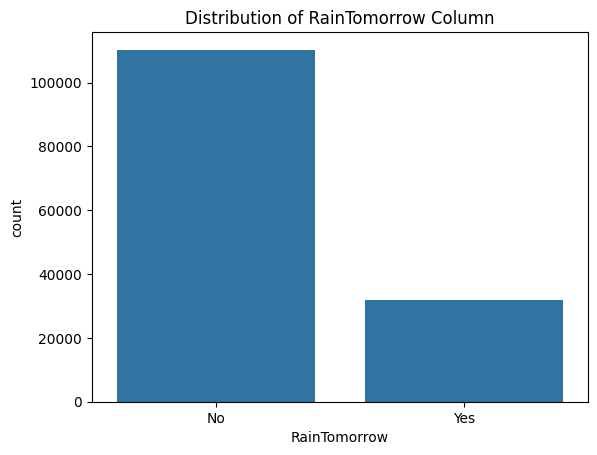

In [7]:
# distribution of the RainTomorrow
sns.countplot(x = 'RainTomorrow', data = data)
plt.title('Distribution of RainTomorrow Column')
plt.show()

In [8]:
# Filling all the missing rows of the numerical columns with median value.
numerical_cols = data.select_dtypes(include = 'number').columns
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())

In [9]:
data.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,10326
WindGustSpeed,0
WindDir9am,10566


In [10]:
# replacing missing values in categorical columns with a random choice

# let us see what are the missing values in the categorical columns

missing_values = data.loc[:,data.isnull().sum() > 0]
for col in missing_values.columns:
    print(f'\n{col}:{missing_values[col].isnull().sum()}')
    print(missing_values[col].unique())


WindGustDir:10326
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']

WindDir9am:10566
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']

WindDir3pm:4228
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']

RainToday:3261
['No' 'Yes' nan]

RainTomorrow:3267
['No' 'Yes' nan]


In [11]:
categorical_columns = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for col in categorical_columns:
    data.loc[data[col].isnull(),col] = np.random.choice(data[col].dropna().unique())

In [12]:
# Cross Checking the percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

,0
Date,0.0
Location,0.0
MinTemp,0.0
MaxTemp,0.0
Rainfall,0.0
Evaporation,0.0
Sunshine,0.0
WindGustDir,0.0
WindGustSpeed,0.0
WindDir9am,0.0


In [13]:
data.shape

(145460, 23)

In [14]:
# creating new columns using the Date column

data['Date'] = pd.to_datetime(data['Date']) # first convert it to date datatype

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data.drop('Date', axis =1, inplace = True)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [15]:
 # checking for duplicate rows in the table
data.duplicated().sum()

np.int64(0)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [17]:
 # convert the Categorical columns to numeric

# first take the object columns and convert to categorical
obj_columns = data.select_dtypes(include = 'object').columns
data[obj_columns] = data[obj_columns].astype('category')

# take these categorical columns to create categorical codes
cat_columns = data.select_dtypes(include = 'category').columns
for col in cat_columns:
    data[col] = data[col].cat.codes


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int8   
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int8   
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int8   
 9   WindDir3pm     145460 non-null  int8   
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [19]:
data.RainTomorrow.value_counts()

,count
RainTomorrow,
0,113583
1,31877


In [20]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


In [21]:
# Outlier analysis
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

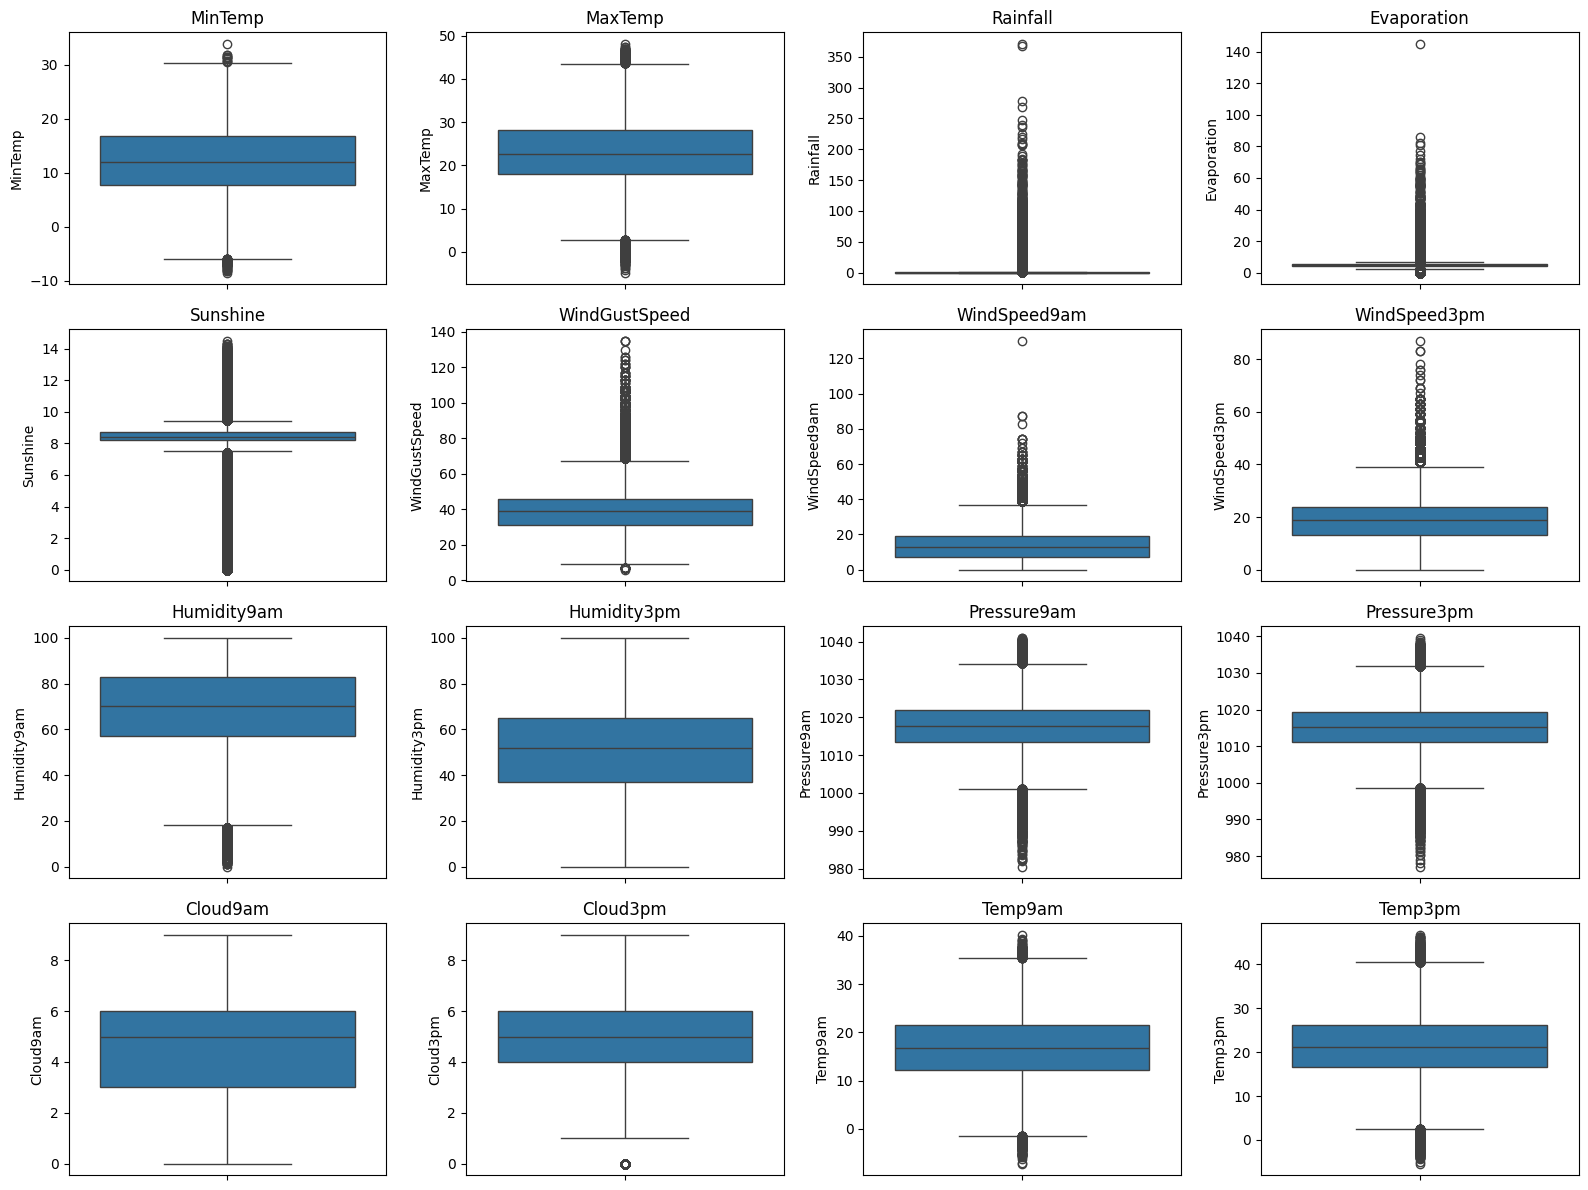

In [22]:
# Defining the list of columns for outlier handling and visualization

varlist = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed',
           'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

varlist = [col for col in varlist if data[col].dtype in ['float64', 'int32']]
plt.figure(figsize = (16,12))
for i ,var in enumerate(varlist,start =1):
    plt.subplot(4,4,i) # Creating a 4x4 grid of subplots
    sns.boxplot(y = data[var])
    plt.title(var)
plt.tight_layout()
plt.show()

In [23]:
varlist = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed',
           'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

# function to handle outliers in each columns of varlist
def handle_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1 # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

# replace the outliers with the bounds
        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

    return data

In [24]:
# Apply the outlier handling function
data = handle_outliers(data, varlist) # applying the handle_outliers function

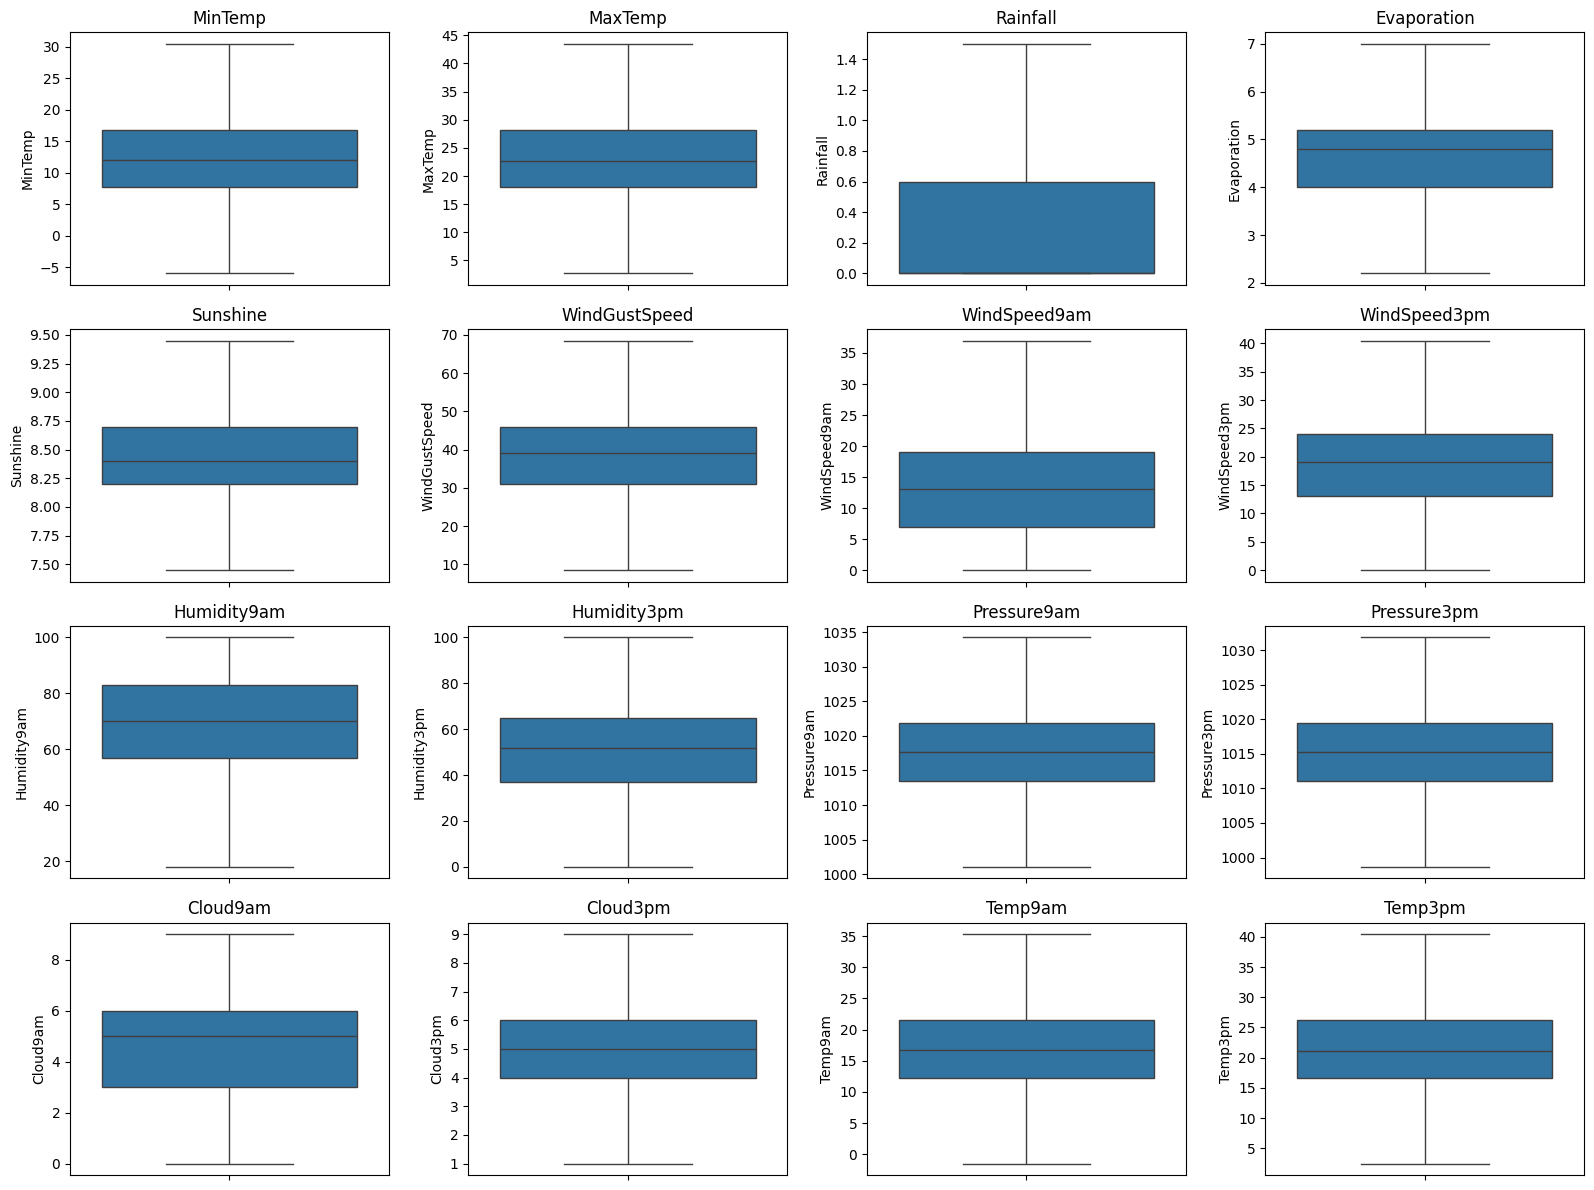

In [25]:
# Plot boxplots to visualize outliers

plt.figure(figsize = (16,12))
for i ,var in enumerate(varlist,start =1):
    plt.subplot(4,4,i)
    sns.boxplot(y = data[var])
    plt.title(var)
plt.tight_layout()
plt.show()

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,23.793524,14.228687,0.00,11.0,24.0,36.0,48.00
MinTemp,145460.0,12.192336,6.364499,-5.95,7.7,12.0,16.8,30.45
MaxTemp,145460.0,23.219758,7.067804,2.70,18.0,22.6,28.2,43.50
Rainfall,145460.0,0.381674,0.608638,0.00,0.0,0.0,0.6,1.50
Evaporation,145460.0,4.750932,1.454089,2.20,4.0,4.8,5.2,7.00
Sunshine,145460.0,8.422820,0.676532,7.45,8.2,8.4,8.7,9.45
WindGustDir,145460.0,7.596679,4.515528,0.00,4.0,8.0,11.0,15.00
WindGustSpeed,145460.0,39.643280,12.175910,8.50,31.0,39.0,46.0,68.50
WindDir9am,145460.0,7.290080,4.375664,0.00,3.0,7.0,11.0,15.00
WindDir3pm,145460.0,7.915118,4.617956,0.00,4.0,8.0,12.0,15.00


In [27]:
### Checking the % of Yes that it will RainTomorrow

rain = (sum(data['RainTomorrow'])/len(data['RainTomorrow'].index))*100
rain

# We have almost 25% of chance that it will rain tomorrow in Australia

21.914615701911178

In [ ]:
#Model Building

from sklearn.model_selection import train_test_split
X = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']
np.random.seed(0)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

x = data.deop(['RainYesterday'], axis=1)
y = data['rainyesterday']
np.random.sees(0)
X_train, X_test, y_train, y_test = train_test_spilt(x,y, test size = 0.2, random_state = 42)

In [1]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed',
           'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']] = scaler.fit_transform(X_train[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed',
           'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']])

X_train.head()

X_test[['minTemp','maxTemp','rainfall','sunshine','windGustSpeed']]
X_test[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed',
           'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']] = scaler.transform(X_test[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed',
           'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']])


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\vaibh\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\vaibh\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\vaibh\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [30]:
X_test[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed',
           'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']] = scaler.transform(X_test[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed',
           'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']])

X_test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
100721,22,0.440559,-0.611073,1.837898,1.273857,-0.625216,6,1.178579,6,7,1.174366,1.469389,0.215082,0.607804,-1.894779,-1.767881,-0.290186,0.126460,0.048195,-0.597632,1,2012,4,22
30234,37,0.142102,0.506902,-0.626773,-0.103731,1.519829,6,-0.052477,13,14,0.940695,-0.424097,-0.427035,-1.445092,-0.708942,-0.957455,-2.043138,-1.836645,-0.013908,0.620543,0,2008,3,30
68427,18,1.068889,0.818236,-0.626773,1.549375,-1.438853,3,1.588931,3,3,2.693228,0.404303,-1.015641,-0.663036,-1.697139,-1.813754,0.148051,0.126460,1.119473,0.811342,0,2011,12,10
28624,34,0.927514,1.271087,-0.626773,-1.756837,-0.033479,4,-0.791110,7,4,-1.629688,-0.187411,1.606333,-0.027616,0.233646,-0.101155,0.148051,0.126460,0.607123,1.457122,0,2013,3,27
31173,37,0.267768,-0.512012,1.837898,-1.756837,-1.438853,11,0.850297,12,8,0.356517,0.404303,1.124746,0.607804,-0.009603,0.479906,1.024527,0.617237,-0.231268,-0.377480,1,2010,10,25


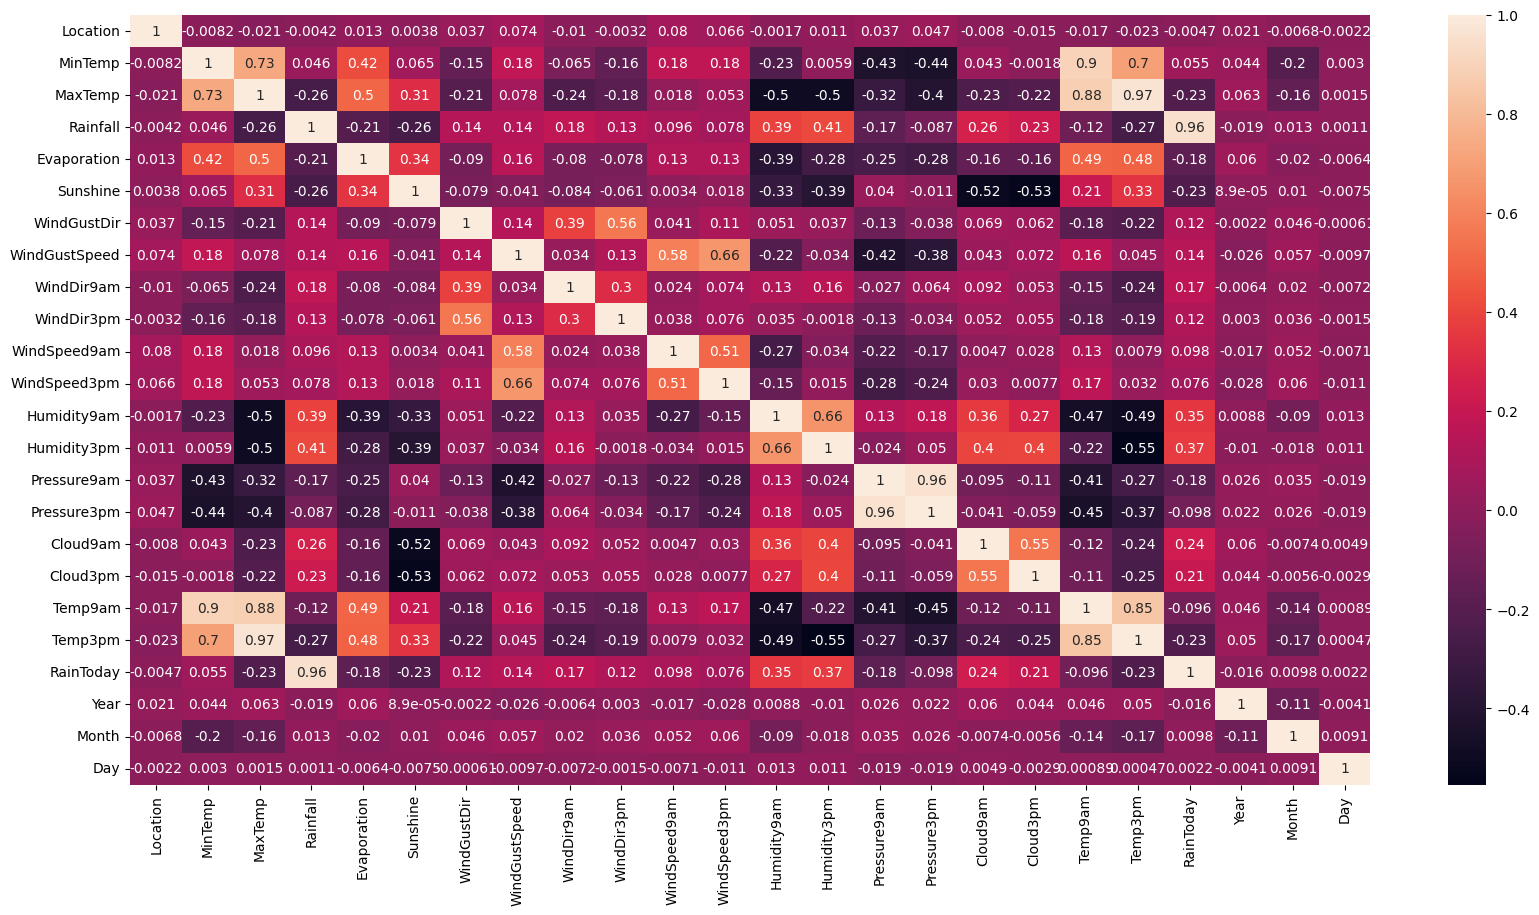

In [31]:
# Correaltion matrix to check for multicolinearlity among X-variables

plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [32]:
# Model 1

import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_const, family = sm.families.Binomial())
result = logm1.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           RainTomorrow   No. Observations:               116368
Model:                            GLM   Df Residuals:                   116343
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41862.
Date:                Thu, 22 May 2025   Deviance:                       83724.
Time:                        14:13:23   Pearson chi2:                 1.13e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2819
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.2128      7.077     -1.443

In [33]:
# Model 2 with RFE

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)


In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Location', np.False_, np.int64(9)),
 ('MinTemp', np.False_, np.int64(4)),
 ('MaxTemp', np.True_, np.int64(1)),
 ('Rainfall', np.True_, np.int64(1)),
 ('Evaporation', np.False_, np.int64(2)),
 ('Sunshine', np.True_, np.int64(1)),
 ('WindGustDir', np.False_, np.int64(7)),
 ('WindGustSpeed', np.True_, np.int64(1)),
 ('WindDir9am', np.False_, np.int64(6)),
 ('WindDir3pm', np.False_, np.int64(5)),
 ('WindSpeed9am', np.True_, np.int64(1)),
 ('WindSpeed3pm', np.True_, np.int64(1)),
 ('Humidity9am', np.True_, np.int64(1)),
 ('Humidity3pm', np.True_, np.int64(1)),
 ('Pressure9am', np.True_, np.int64(1)),
 ('Pressure3pm', np.True_, np.int64(1)),
 ('Cloud9am', np.True_, np.int64(1)),
 ('Cloud3pm', np.True_, np.int64(1)),
 ('Temp9am', np.True_, np.int64(1)),
 ('Temp3pm', np.True_, np.int64(1)),
 ('RainToday', np.True_, np.int64(1)),
 ('Year', np.False_, np.int64(10)),
 ('Month', np.False_, np.int64(3)),
 ('Day', np.False_, np.int64(8))]

In [35]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Location', 'MinTemp', 'Evaporation', 'WindGustDir', 'WindDir9am',
       'WindDir3pm', 'Year', 'Month', 'Day'],
      dtype='object')

In [36]:
# Re-run the model using the RFE  selected variables

X_train_rfe = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           RainTomorrow   No. Observations:               116368
Model:                            GLM   Df Residuals:                   116352
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41899.
Date:                Thu, 22 May 2025   Deviance:                       83797.
Time:                        14:13:46   Pearson chi2:                 1.13e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2815
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.8628      0.017   -106.544

In [37]:
y_train_pred = res.predict(X_train_rfe)
y_train_pred[:10]

,0
111548,0.187947
142528,0.037584
65304,0.128472
40651,0.109713
97487,0.052849
103132,0.215384
2551,0.034364
71662,0.017305
133371,0.050207
95882,0.831913


In [38]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18794739, 0.03758382, 0.12847244, 0.1097132 , 0.05284856,
       0.2153839 , 0.03436381, 0.0173053 , 0.05020723, 0.83191311])

In [39]:
# create a dataframe to put actual and predicted values


# Initialize DataFrame
y_train_pred_final = pd.DataFrame()
y_train_pred_final['ID'] = y_train.index

# Correct way to add columns
y_train_pred_final['RainTomorrow'] = y_train.values
y_train_pred_final['RainTomorrow_Prob'] = y_train_pred  # Assuming y_train_pred is defined

# Display the first few rows
y_train_pred_final.head()


,ID,RainTomorrow,RainTomorrow_Prob
0,111548,1,0.187947
1,142528,0,0.037584
2,65304,0,0.128472
3,40651,0,0.109713
4,97487,0,0.052849


In [40]:
# making an asumption that predicted = 1 if RainTomorrow_Prob>0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.RainTomorrow_Prob.map(lambda x:1if x > 0.5 else 0)
y_train_pred_final.head()

,ID,RainTomorrow,RainTomorrow_Prob,Predicted
0,111548,1,0.187947,0
1,142528,0,0.037584,0
2,65304,0,0.128472,0
3,40651,0,0.109713,0
4,97487,0,0.052849,0


In [41]:
from sklearn import metrics


In [42]:
metrics.confusion_matrix(y_train_pred_final.RainTomorrow,y_train_pred_final.Predicted)

array([[85955,  4956],
       [13158, 12299]])

In [43]:
metrics.accuracy_score(y_train_pred_final.RainTomorrow,y_train_pred_final.Predicted)

0.8443386498006324

In [44]:
#### Checking VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
13,Temp3pm,22.08
0,MaxTemp,21.78
8,Pressure9am,16.72
9,Pressure3pm,16.50
12,Temp9am,10.92
7,Humidity3pm,4.95
1,Rainfall,4.05
14,RainToday,3.53
6,Humidity9am,3.41
3,WindGustSpeed,2.44


In [45]:
# # Dropping column which has high VIFs Temp3pm and build the model 3

col = col.drop('Temp3pm', 1)

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           RainTomorrow   No. Observations:               116368
Model:                            GLM   Df Residuals:                   116353
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41913.
Date:                Thu, 22 May 2025   Deviance:                       83826.
Time:                        14:13:47   Pearson chi2:                 1.13e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2813
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.8649      0.017   -106.680

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
8,Pressure9am,16.26
9,Pressure3pm,16.10
0,MaxTemp,10.85
12,Temp9am,9.70
1,Rainfall,4.05
7,Humidity3pm,3.90
13,RainToday,3.53
6,Humidity9am,3.13
3,WindGustSpeed,2.43
5,WindSpeed3pm,1.94


In [47]:
# # Dropping column which has high VIFs Pressure9am and build the model 4

col = col.drop('Pressure9am', 1)
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           RainTomorrow   No. Observations:               116368
Model:                            GLM   Df Residuals:                   116354
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42250.
Date:                Thu, 22 May 2025   Deviance:                       84500.
Time:                        14:13:50   Pearson chi2:                 1.15e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2771
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.8639      0.017   -107.141

In [48]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,MaxTemp,10.37
11,Temp9am,9.41
1,Rainfall,4.00
7,Humidity3pm,3.89
12,RainToday,3.52
6,Humidity9am,3.12
3,WindGustSpeed,2.41
5,WindSpeed3pm,1.94
4,WindSpeed9am,1.72
10,Cloud3pm,1.72


In [49]:
# Dropping MaxTemp and build the model 5

col = col.drop('MaxTemp', 1)
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           RainTomorrow   No. Observations:               116368
Model:                            GLM   Df Residuals:                   116355
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42250.
Date:                Thu, 22 May 2025   Deviance:                       84500.
Time:                        14:13:55   Pearson chi2:                 1.15e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2771
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.8641      0.017   -107.532

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,Rainfall,3.94
11,RainToday,3.52
5,Humidity9am,2.67
2,WindGustSpeed,2.41
6,Humidity3pm,2.14
4,WindSpeed3pm,1.91
9,Cloud3pm,1.71
3,WindSpeed9am,1.70
8,Cloud9am,1.69
1,Sunshine,1.65


In [51]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.16533766, 0.03191854, 0.13740329, ..., 0.02731011, 0.70767765,
       0.0247461 ])

In [52]:
y_train_pred_final['RainTomorrow_Prob'] = y_train_pred
y_train_pred_final['Predicted'] = y_train_pred_final.RainTomorrow_Prob.map(lambda x:1if x > 0.5 else 0)
y_train_pred_final.head()

,ID,RainTomorrow,RainTomorrow_Prob,Predicted
0,111548,1,0.165338,0
1,142528,0,0.031919,0
2,65304,0,0.137403,0
3,40651,0,0.137646,0
4,97487,0,0.056891,0


In [53]:
metrics.accuracy_score(y_train_pred_final.RainTomorrow,y_train_pred_final.Predicted)

0.8430238553554241

In [54]:
confusion = metrics.confusion_matrix(y_train_pred_final.RainTomorrow,y_train_pred_final.Predicted)
confusion

array([[85908,  5003],
       [13264, 12193]])

In [55]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]


# Let's see the sensitivity of our logistic regression model
print("sensitivity =",  TP / float(TP+FN))

# Let us calculate specificity
print("specificity = ", TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive rate =", FP/float(TN+FP))

# positive predictive value
print("Positive predicted rate =", TP/float(TP+FP))

# Negative predictive value
print ("Negative predicted Rate =", TN / float(TN+ FN))

sensitivity = 0.47896452842047377
specificity =  0.9449681556687309
False positive rate = 0.05503184433126904
Positive predicted rate = 0.7090602465689695
Negative predicted Rate = 0.8662525712902835


In [56]:
# Plot the ROC Curve
def draw_roc(actual, probs):
  fpr, tpr , thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
  auc_score = metrics.roc_auc_score(actual, probs)
  plt.figure(figsize = (5,5))
  plt.plot(fpr, tpr, label = "ROC Curve(area = %0.2f)" % auc_score)
  plt.plot([0,1], [0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False positive rate or [1- True negative rate]")
  plt.ylabel("True positive rate")
  plt.title("Receiver Operating Characteristic Curve")
  plt.legend(loc = "lower right")
  plt.show()
  return

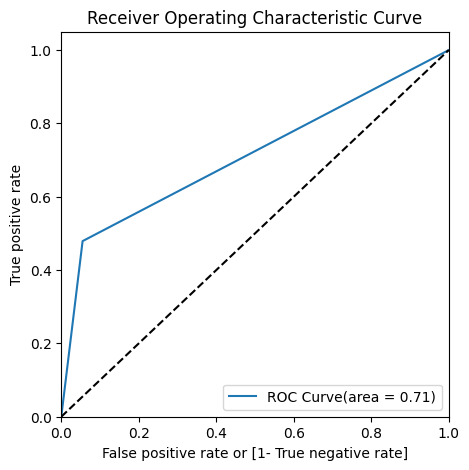

In [57]:
fpr, tpr , thresholds = metrics.roc_curve(y_train_pred_final.RainTomorrow,y_train_pred_final.Predicted, drop_intermediate=False)
draw_roc(y_train_pred_final.RainTomorrow,y_train_pred_final.Predicted)

In [58]:
# finding the optimal cut off point

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
  y_train_pred_final[i] = y_train_pred_final.RainTomorrow_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,ID,RainTomorrow,RainTomorrow_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,111548,1,0.165338,0,1,1,0,0,0,0,0,0,0,0
1,142528,0,0.031919,0,1,0,0,0,0,0,0,0,0,0
2,65304,0,0.137403,0,1,1,0,0,0,0,0,0,0,0
3,40651,0,0.137646,0,1,1,0,0,0,0,0,0,0,0
4,97487,0,0.056891,0,1,0,0,0,0,0,0,0,0,0


In [59]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['Prob', 'Accuracy','Sensitivity', 'Specificity'])
from sklearn.metrics import confusion_matrix


# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

# List of probability cutoffs to evaluate
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    # Create binary predictions based on the cutoff
    y_train_pred_final['Predicted_Label'] = y_train_pred_final['RainTomorrow_Prob'].apply(lambda x: 1 if x >= i else 0)

# Compute the confusion matrix
    cm1 = confusion_matrix(y_train_pred_final['RainTomorrow'], y_train_pred_final['Predicted_Label'])

# Calculate accuracy, sensitivity, and specificity
    total1 = sum(sum(cm1))
    Accuracy = (cm1[0,0] + cm1[1,1]) / total1
    Specificity = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    Sensitivity = cm1[1,1] / (cm1[1,0] + cm1[1,1])

# Store the results in the DataFrame
    cutoff_df.loc[i] = [i, Accuracy, Sensitivity, Specificity]

print(cutoff_df)

     Prob  Accuracy  Sensitivity  Specificity
0.0   0.0  0.218763     1.000000     0.000000
0.1   0.1  0.639411     0.910280     0.563562
0.2   0.2  0.766955     0.786110     0.761591
0.3   0.3  0.816255     0.676238     0.855463
0.4   0.4  0.837430     0.578466     0.909945
0.5   0.5  0.843024     0.478965     0.944968
0.6   0.6  0.840265     0.383431     0.968189
0.7   0.7  0.829704     0.279452     0.983786
0.8   0.8  0.813557     0.170444     0.993642
0.9   0.9  0.793268     0.058844     0.998922


<function matplotlib.pyplot.show(close=None, block=None)>

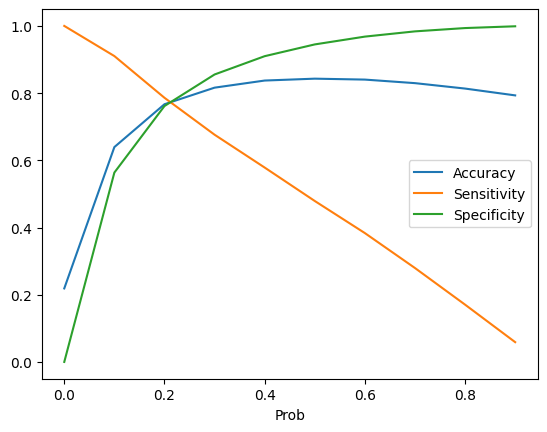

In [60]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x = 'Prob', y = ['Accuracy', 'Sensitivity', 'Specificity'])
plt.show

In [61]:
y_train_pred_final['final_predicted'] = y_train_pred_final.RainTomorrow_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,ID,RainTomorrow,RainTomorrow_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_Label,final_predicted
0,111548,1,0.165338,0,1,1,0,0,0,0,0,0,0,0,0,0
1,142528,0,0.031919,0,1,0,0,0,0,0,0,0,0,0,0,0
2,65304,0,0.137403,0,1,1,0,0,0,0,0,0,0,0,0,0
3,40651,0,0.137646,0,1,1,0,0,0,0,0,0,0,0,0,0
4,97487,0,0.056891,0,1,0,0,0,0,0,0,0,0,0,0,0


In [62]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.RainTomorrow, y_train_pred_final.final_predicted)

0.7669548329437647

In [63]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.RainTomorrow, y_train_pred_final.final_predicted )
confusion2

array([[69237, 21674],
       [ 5445, 20012]])

In [64]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [65]:
# Let us calculate specificity
TN / float(TN+FP)

np.float64(0.7615910065888616)

In [66]:
# Let us calculate specificity
TN / float(TN+FP)


np.float64(0.7615910065888616)

In [67]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23840899341113836


In [68]:
# Positive predictive value
print (TP / float(TP+FP))

0.480065249724128


In [69]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9270908652687394


In [70]:
# Preciosin and Recall
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.RainTomorrow, y_train_pred_final.Predicted )
confusion

array([[85908,  5003],
       [13264, 12193]])

In [71]:
print("Precision =", confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision = 0.7090602465689695


In [72]:
print("Recall =", confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall = 0.47896452842047377


In [73]:
from sklearn.metrics import precision_score, recall_score
print("Precision =", precision_score(y_train_pred_final.RainTomorrow, y_train_pred_final.Predicted))
print("Recall =", recall_score(y_train_pred_final.RainTomorrow, y_train_pred_final.Predicted))

Precision = 0.7090602465689695
Recall = 0.47896452842047377


In [74]:
  ### Precision and recall tradeoff


from sklearn.metrics import precision_recall_curve
y_train_pred_final.RainTomorrow[:10], y_train_pred_final.Predicted[:10]

(0    1
 1    0
 2    0
 3    0
 4    0
 5    0
 6    0
 7    0
 8    0
 9    1
 Name: RainTomorrow, dtype: int8,
 0    0
 1    0
 2    0
 3    0
 4    0
 5    0
 6    0
 7    0
 8    0
 9    1
 Name: Predicted, dtype: int64)

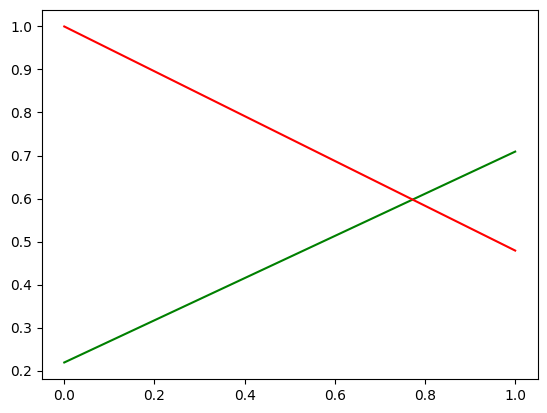

In [75]:
p , r , thresholds = precision_recall_curve(y_train_pred_final.RainTomorrow, y_train_pred_final.Predicted)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

In [76]:
### Making predictions on the test set
X_test = X_test[col]
X_test.head()

,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,RainToday
100721,1.837898,-0.625216,1.178579,1.174366,1.469389,0.215082,0.607804,-1.767881,-0.290186,0.126460,0.048195,1
30234,-0.626773,1.519829,-0.052477,0.940695,-0.424097,-0.427035,-1.445092,-0.957455,-2.043138,-1.836645,-0.013908,0
68427,-0.626773,-1.438853,1.588931,2.693228,0.404303,-1.015641,-0.663036,-1.813754,0.148051,0.126460,1.119473,0
28624,-0.626773,-0.033479,-0.791110,-1.629688,-0.187411,1.606333,-0.027616,-0.101155,0.148051,0.126460,0.607123,0
31173,1.837898,-1.438853,0.850297,0.356517,0.404303,1.124746,0.607804,0.479906,1.024527,0.617237,-0.231268,1


In [77]:

X_test_sm = sm.add_constant(X_test[col])

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

,0
100721,0.634818
30234,0.014186
68427,0.308549
28624,0.106822
31173,0.526412
573,0.037226
120056,0.012857
43057,0.529151
28966,0.199000
90691,0.569354


In [78]:
y_test_pred = res.predict(X_test_sm)

In [79]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1[:10]

,0
100721,0.634818
30234,0.014186
68427,0.308549
28624,0.106822
31173,0.526412
573,0.037226
120056,0.012857
43057,0.529151
28966,0.199000
90691,0.569354


In [80]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [81]:
# Putting LocationID to index
y_test_df['ID'] = y_test_df.index

In [82]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [83]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [84]:
y_pred_final.head()

,RainTomorrow,ID,0
0,1,100721,0.634818
1,0,30234,0.014186
2,0,68427,0.308549
3,0,28624,0.106822
4,0,31173,0.526412


In [85]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'RainTomorrow_Prob'})

In [86]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(columns=['RainTomorrow', 'RainTomorrow_Prob'])

# Let's see the head of y_pred_final
y_pred_final.head()

,RainTomorrow,RainTomorrow_Prob
0,1,0.634818
1,0,0.014186
2,0,0.308549
3,0,0.106822
4,0,0.526412


In [87]:
  # Based on the precision and Recall trade off graph choosing cutoff as 0.8 , please use accordingly for your data
y_pred_final['Final_Predicted'] = y_pred_final.RainTomorrow_Prob.map(lambda x: 1 if x > 0.8 else 0)

In [88]:
confusion2 = metrics.confusion_matrix(y_pred_final.RainTomorrow, y_pred_final.Final_Predicted )
confusion2

array([[22535,   137],
       [ 5367,  1053]])

In [89]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [90]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

np.float64(0.16401869158878504)

In [91]:
# Let us calculate specificity
TN / float(TN+FP)

np.float64(0.9939573041637262)

In [92]:
metrics.accuracy_score(y_pred_final.RainTomorrow, y_pred_final.Final_Predicted )


0.8108070947339475